In [ ]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [ ]:
import torch
import numpy as np
import random
from copy import deepcopy
from torch import nn
from torch.autograd import Variable
from torch.nn import functional as F 

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0) 
torch.backends.cudnn.deterministic = True

In [ ]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz

from torchvision.datasets import MNIST
from torchvision import transforms

MNIST_train = MNIST('./', download=True, transform = transforms.ToTensor(), train=True)
MNIST_test = MNIST('./', download=True, transform = transforms.ToTensor(), train=False)


--2022-03-29 16:56:36--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2022-03-29 16:56:36--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz            [             <=>    ]  33.20M  13.6MB/s    in 2.4s    

2022-03-29 16:56:39 (13.6 MB/s) - ‘MNIST.tar.gz’ saved [34813078]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/tra

In [ ]:
trans = transforms.Compose([
    #transforms.RandomHorizontalFlip(),
    #transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=12,),
    transforms.RandomAffine(degrees=15),
])

In [ ]:
X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

train_indices_01 = []; train_indices_23 = []; train_indices_45 = []; train_indices_67 = []; train_indices_89 = []
test_indices_01 = []; test_indices_23 = []; test_indices_45 = []; test_indices_67 = []; test_indices_89 = []
for i in range(len(y_train)):
  if y_train[i] == 0 or y_train[i] == 1:
    train_indices_01.append(i)
  elif y_train[i] == 2 or y_train[i] == 3:
    train_indices_23.append(i)
  elif y_train[i] == 4 or y_train[i] == 5:
    train_indices_45.append(i)
  elif y_train[i] == 6 or y_train[i] == 7:
    train_indices_67.append(i)
  elif y_train[i] == 8 or y_train[i] == 9:
    train_indices_89.append(i)
  


for i in range(len(y_test)):
  if y_test[i] == 0 or y_test[i] == 1:
    test_indices_01.append(i)
  elif y_test[i] == 2 or y_test[i]== 3:
    test_indices_23.append(i)
  elif y_test[i] == 4 or y_test[i] == 5:
    test_indices_45.append(i)
  elif y_test[i] == 6 or y_test[i] == 7:
    test_indices_67.append(i)
  elif y_test[i] == 8 or y_test[i] == 9:
    test_indices_89.append(i)



X_train_01 = X_train[train_indices_01]
y_train_01 = y_train[train_indices_01]
X_test_01 = X_test[test_indices_01]
y_test_01 = y_test[test_indices_01]

X_train_23 = X_train[train_indices_23]
y_train_23 = y_train[train_indices_23]
X_test_23 = X_test[test_indices_23]
y_test_23 = y_test[test_indices_23]

X_train_45 = X_train[train_indices_45]
y_train_45 = y_train[train_indices_45]
X_test_45 = X_test[test_indices_45]
y_test_45 = y_test[test_indices_45]

X_train_67 = X_train[train_indices_67]
y_train_67 = y_train[train_indices_67]
X_test_67 = X_test[test_indices_67]
y_test_67 = y_test[test_indices_67]

X_train_89 = X_train[train_indices_89]
y_train_89 = y_train[train_indices_89]
X_test_89 = X_test[test_indices_89]
y_test_89 = y_test[test_indices_89]


X_test_01 = X_test_01.to(device)

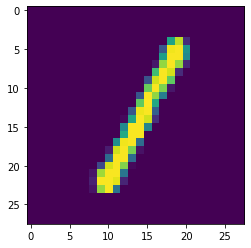

tensor(1)


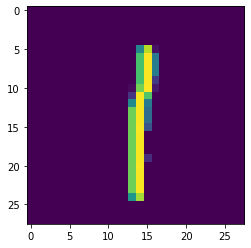

tensor(1)


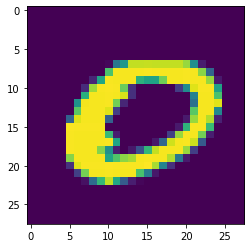

tensor(0)


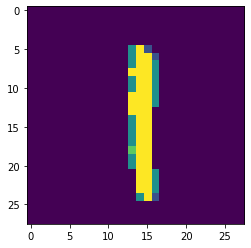

tensor(1)


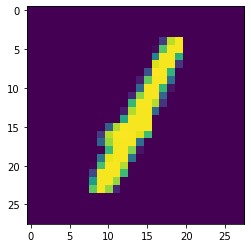

tensor(1)


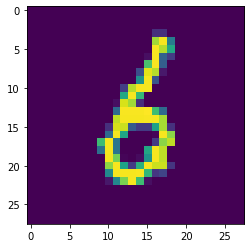

tensor(6)


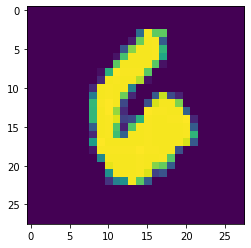

tensor(6)


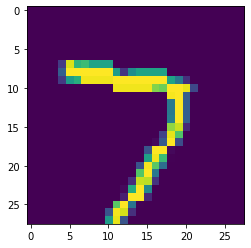

tensor(7)


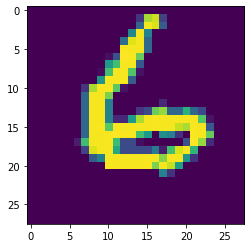

tensor(6)


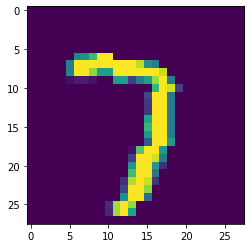

tensor(7)


In [ ]:
import matplotlib.pyplot as plt
def plot_num(x, y, count = 5):
    for i in np.random.permutation(len(x))[:count]:
        plt.imshow(x[i,:,:])
        plt.show()
        print(y[i])
plot_num(X_train_01, y_train_01) 
plot_num(trans(X_train_67), y_train_67)



In [ ]:
def aug_extended_data(data, answers, count = 4):
    aug_data = data
    aug_answers = answers
    print(len(aug_data))
    for i in range(count):
        aug_data = torch.cat((aug_data, trans(data)))
        aug_answers = torch.cat((aug_answers, answers))
    print(len(aug_data))
    aug_permutation = np.random.permutation(len(aug_data))
    aug_data = aug_data[aug_permutation]
    aug_answers = aug_answers[aug_permutation]
    return aug_data, aug_answers


In [ ]:
aug_data, aug_answers = aug_extended_data(X_train_01[:3,:,:], y_train_01[:3])

3
15


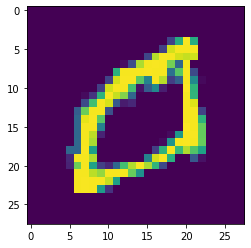

tensor(0)


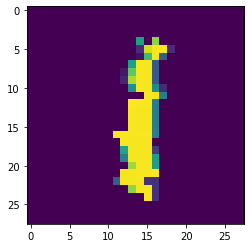

tensor(1)


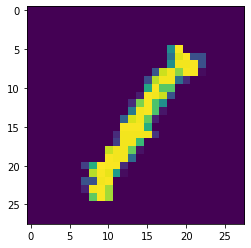

tensor(1)


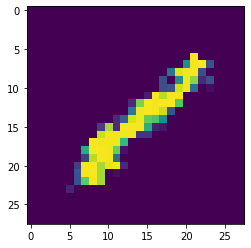

tensor(1)


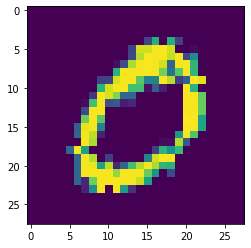

tensor(0)


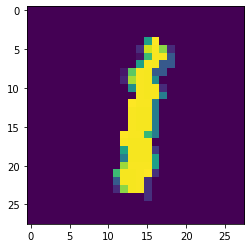

tensor(1)


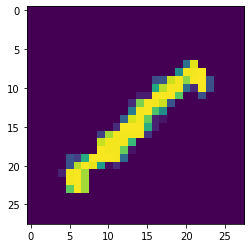

tensor(1)


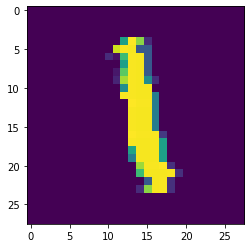

tensor(1)


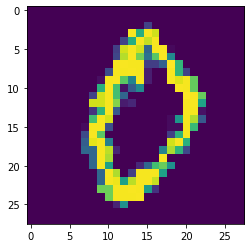

tensor(0)


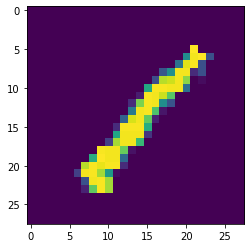

tensor(1)


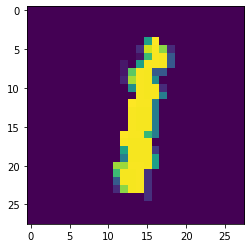

tensor(1)


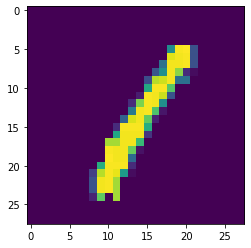

tensor(1)


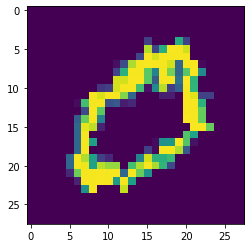

tensor(0)


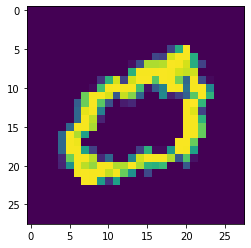

tensor(0)


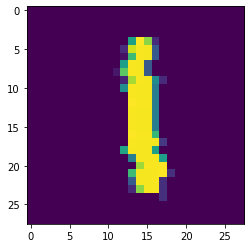

tensor(1)


In [ ]:
for i in range(len(aug_data)):
    plt.imshow(trans(aug_data)[i,:,:])
    plt.show()
    print(aug_answers[i])

In [ ]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

X_train_01 = X_train_01.unsqueeze(1).float()
X_test_01 = X_test_01.unsqueeze(1).float()

X_train_23 = X_train_23.unsqueeze(1).float()
X_test_23 = X_test_23.unsqueeze(1).float()

X_train_45 = X_train_45.unsqueeze(1).float()
X_test_45 = X_test_45.unsqueeze(1).float()

X_train_67 = X_train_67.unsqueeze(1).float()
X_test_67 = X_test_67.unsqueeze(1).float()

X_train_89 = X_train_89.unsqueeze(1).float()
X_test_89 = X_test_89.unsqueeze(1).float()

In [ ]:
class YannLecun(torch.nn.Module):
  def __init__(self,activation = 'leaky relu', pooling = 'max', conv_size = 3, use_batch_norm = False, use_dropout = False):
    super(YannLecun, self).__init__()
    self.conv_size = conv_size
    self.use_batch_norm = use_batch_norm
    self.use_dropout = use_dropout

    if activation == 'relu':
      activation_function = torch.nn.ReLU()
    elif activation == 'tanh':
      activation_function = torch.nn.Tanh()
    elif activation == 'leaky relu':
        activation_function = torch.nn.LeakyReLU()
    else:
      raise NotImplementedError   

    if pooling == 'max':
      pooling_layer = torch.nn.MaxPool2d(kernel_size = 2, stride = 2)
    elif pooling == 'avg':
      pooling_layer = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
    else:
      raise NotImplementedError   
    
    if conv_size == 3:
      self.conv1_1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, padding=1)
      self.conv1_2 = torch.nn.Conv2d(in_channels=6, out_channels=6, kernel_size=3, padding=1)
    elif conv_size == 5:
      self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
    else:
      raise NotImplementedError
    
    self.act1 = activation_function
    self.bn1 = torch.nn.BatchNorm2d(num_features=6)
    self.pool1 = pooling_layer
    self.dp1 = torch.nn.Dropout(p = 0.25) 

    if conv_size == 3:
      self.conv2_1 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, padding=0)
      self.conv2_2 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=0)
    elif conv_size == 5:
      self.conv2 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=0)
    else:
      raise NotImplementedError

    self.act2 = activation_function
    self.bn2 = torch.nn.BatchNorm2d(num_features=16)
    self.pool2 = pooling_layer
    self.dp2 = torch.nn.Dropout(p=0.25) 

    self.fc1 = torch.nn.Linear(5*5*16, 120)
    self.act3 = torch.nn.Tanh()
    self.dp3 = torch.nn.Dropout(p = 0.5) 

    self.fc2 = torch.nn.Linear(120,84)
    self.act4 = torch.nn.Tanh()
    self.dp4 = torch.nn.Dropout(p=0.5) 

    self.fc3 = torch.nn.Linear(84,10)
    self.act5 = torch.nn.Softmax()


  def forward(self,x):
    if self.conv_size == 3:
      x = self.conv1_1(x)
      x = self.conv1_2(x)
    elif self.conv_size == 5:
      x = self.conv1(x)

    x = self.act1(x)
    if self.use_batch_norm:
      x = self.bn1(x)
    x = self.pool1(x)
    if self.use_dropout:
      x = self.dp1(x)


    if self.conv_size == 3:
      x = self.conv2_1(x)
      x = self.conv2_2(x)
    elif self.conv_size == 5:
      x = self.conv2(x)
    
    x = self.act2(x)
    if self.use_batch_norm:
      x = self.bn2(x)
    x = self.pool2(x)
    if self.use_dropout:
      x = self.dp2(x)

    x = x.view(x.size(0),x.size(1)*x.size(2)*x.size(3))

    x = self.fc1(x)
    x = self.act3(x)
    if self.use_dropout:
      x = self.dp3(x)
    x = self.fc2(x)
    x = self.act4(x)
    if self.use_dropout:
      x = self.dp4(x)
    x = self.fc3(x)
    x = self.act5(x)
    
    x = x.to(device)

    return x

yann_lecun = YannLecun(use_batch_norm = True, use_dropout =True)
yann_lecun = yann_lecun.to(device)
loss = torch.nn.CrossEntropyLoss()
my_optimizer = torch.optim.Adam(yann_lecun.parameters(), lr=4.0e-4)

In [ ]:
def variable(t: torch.Tensor, use_cuda=True, **kwargs): 
    if torch.cuda.is_available() and use_cuda:         
        t = t.cuda()
    return Variable(t, **kwargs)


class EWC(object):
    def __init__(self, old_x, old_y = None, model = yann_lecun):

        self.model = model
        self.old_x = old_x
        self.old_y = old_y
        self.params = {n: p for n, p in self.model.named_parameters() if p.requires_grad}
        self._old_params = {}
        self._precision_matrices = self._diag_fisher() 

        for n, p in deepcopy(self.params).items():
            self._old_params[n] = variable(p.data)


    def _diag_fisher(self):
        precision_matrices = {}
        for n, p in deepcopy(self.params).items(): 
            p.data.zero_() 
            precision_matrices[n] = variable(p.data) 

        self.model.eval() 
        self.model.zero_grad() 
        self.old_x = variable(self.old_x) 
        output = self.model(self.old_x)
        output = output.to(device)
        loss = F.nll_loss(F.log_softmax(output, dim=1), self.old_y)
        loss.backward()

        for n, p in self.model.named_parameters():
            precision_matrices[n].data += p.grad.data ** 2 / len(self.old_x)

        precision_matrices = {n: p for n, p in precision_matrices.items()}
        return precision_matrices

    def penalty(self, model: nn.Module):
        loss = 0
        for n, p in model.named_parameters():
            _loss = self._precision_matrices[n].data * (p - self._old_params[n].data) ** 2
            loss += _loss.sum()
        return loss


In [ ]:
def normal_train(X_trains, y_trains, X_tests, y_tests, model = yann_lecun, optimizer = my_optimizer, epochs = 5, batch_sizes = 100):
    model.train() 
    batch_size = batch_sizes
    test_accuracy_history = []
    test_loss_history = []

    X_tests = X_tests.to(device)
    y_tests = y_tests.to(device)

    for epoch in range(epochs):
        order = np.random.permutation(len(X_trains))
        for start_index in range(0,len(X_trains), batch_size):
            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_trains[batch_indexes].to(device)
            y_batch = y_trains[batch_indexes].to(device)

            X_batch, y_batch = variable(X_batch), variable(y_batch)
            optimizer.zero_grad()
            preds = model.forward(X_batch)
            loss_value = loss(preds, y_batch)
            loss_value.backward()
            optimizer.step()
        
        test_preds = model.forward(X_tests)
        test_loss_history.append(loss(test_preds, y_tests).data.cpu())

        accuracy = (test_preds.argmax(dim = 1) == y_tests).float().mean().data.cpu()
        test_accuracy_history.append(accuracy)
        print(accuracy)  


def ewc_train(X_trains, y_trains, X_tests, y_tests, old_x_test, old_y_test, number, 
              ewc: EWC, importance, epochs = 0, model = yann_lecun, optimizer = my_optimizer, batch_sizes=100):
    model.train()
    batch_size = batch_sizes
    test_accuracy_history = []
    test_loss_history = []

    X_tests = X_tests.to(device)
    y_tests = y_tests.to(device)
    temp_epoch = 1
    while True:
        order = np.random.permutation(len(X_trains))
        for start_index in range(0,len(X_trains), batch_size):
            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_trains[batch_indexes].to(device)
            y_batch = y_trains[batch_indexes].to(device)

            X_batch, y_batch = variable(X_batch), variable(y_batch)
            optimizer.zero_grad()
            preds = model.forward(X_batch)
            loss_value = loss(preds, y_batch) + importance * ewc.penalty(model)
            loss_value.backward()
            optimizer.step()
        
        test_preds = model.forward(X_tests)
        test_loss_history.append(loss(test_preds, y_tests).data.cpu())

        accuracy = (test_preds.argmax(dim = 1) == y_tests).float().mean().data.cpu()
        test_accuracy_history.append(accuracy)
        old_accuracy = test_accuracy(old_x_test, old_y_test)
        print('accuracy on current task: ',accuracy)
        print('accuracy on old task: ', old_accuracy)
        if number == 1:
            print('accuracy on 01: ', test_accuracy(X_test_01,y_test_01),'\n')
        elif number == 2:
            print('accuracy on 01: ', test_accuracy(X_test_01,y_test_01))
            print('accuracy on 23: ', test_accuracy(X_test_23,y_test_23),'\n')
        elif number == 3:
            print('accuracy on 01: ', test_accuracy(X_test_01,y_test_01))
            print('accuracy on 23: ', test_accuracy(X_test_23,y_test_23))
            print('accuracy on 45: ', test_accuracy(X_test_45,y_test_45),'\n')
        elif number == 4:
            print('accuracy on 01: ', test_accuracy(X_test_01,y_test_01))
            print('accuracy on 23: ', test_accuracy(X_test_23,y_test_23))
            print('accuracy on 45: ', test_accuracy(X_test_45,y_test_45))
            print('accuracy on 67: ', test_accuracy(X_test_67,y_test_67),'\n')

        if temp_epoch == epochs:
            break
        temp_epoch += 1
        if (accuracy >= old_accuracy or (abs(accuracy - old_accuracy) <= 0.05 and number == 1) or abs(accuracy - old_accuracy) <= 0.04) and epochs == 0:
            break

def test_accuracy(x_test, y_test):
    x_test = x_test.to(device)
    test_preds = yann_lecun.forward(x_test)
    test_preds = test_preds.to(device)
    y_test = y_test.to(device)
    accuracy = (test_preds.argmax(dim = 1) == y_test).float().mean().data.cpu()
    return accuracy


def get_indices(x_train, percentage):
    order = np.random.permutation(len(x_train))
    #print('order type is ', type(order))
    return order[:(len(order)*percentage)//100]

def get_worst_ind(model, x_train, y_train, percentage):
    preds = model.forward(x_train.to(device))
    enough = (len(preds)*percentage)//100
    worst_inds = []
    for i in range(len(preds)):
        if preds[i].argmax() != y_train[i]:
            worst_inds.append(i)
    already_have = len(worst_inds)
    if already_have >= enough:
        return np.array(worst_inds[:enough])
    set_worst_inds = set(worst_inds)
    print(set_worst_inds)
    for i in np.random.permutation(len(x_train)):
        if already_have == enough: return np.array(worst_inds)
        if i not in set_worst_inds:
            worst_inds.append(i)
            already_have += 1



In [ ]:
pytorch_total_params = sum(p.numel() for p in yann_lecun.parameters())
print(pytorch_total_params)

62768


In [ ]:
%%time
normal_train(X_train_01,y_train_01,X_test_01,y_test_01)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor(0.9986)
tensor(0.9995)
tensor(0.9995)
tensor(0.9991)
tensor(0.9995)
CPU times: user 7.66 s, sys: 97.7 ms, total: 7.76 s
Wall time: 7.95 s


In [ ]:

old_tasks = X_train_01
old_y = y_train_01
old_x_test = X_test_01
old_y_test = y_test_01

order = get_worst_ind(yann_lecun, X_train_01, y_train_01, 20)
aug_x_train_01, aug_y_train_01 = aug_extended_data(X_train_01[order], y_train_01[order])

cur_x_train = torch.cat((X_train_23, aug_x_train_01))
cur_y_train = torch.cat((y_train_23.to(device), aug_y_train_01.to(device)))
new_permutation = np.random.permutation(len(cur_x_train))
cur_x_train = cur_x_train[new_permutation]
cur_y_train = cur_y_train[new_permutation]

old_y = old_y.to(device)
my_ewc = EWC(old_tasks, old_y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


{6626, 4611, 8546, 1449, 6409, 4495, 8184, 314}
2533
12665


In [ ]:
%%time
ewc_train(cur_x_train,cur_y_train,X_test_23,y_test_23,old_x_test, old_y_test,1, my_ewc, importance=9e13)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


accuracy on current task:  tensor(0.)
accuracy on old task:  tensor(0.9991)
accuracy on 01:  tensor(0.9991) 

accuracy on current task:  tensor(0.)
accuracy on old task:  tensor(0.9981)
accuracy on 01:  tensor(0.9991) 

accuracy on current task:  tensor(0.)
accuracy on old task:  tensor(0.9991)
accuracy on 01:  tensor(0.9991) 

accuracy on current task:  tensor(0.7845)
accuracy on old task:  tensor(0.9868)
accuracy on 01:  tensor(0.9891) 

accuracy on current task:  tensor(0.9226)
accuracy on old task:  tensor(0.9830)
accuracy on 01:  tensor(0.9825) 

accuracy on current task:  tensor(0.9354)
accuracy on old task:  tensor(0.9764)
accuracy on 01:  tensor(0.9773) 

CPU times: user 23.5 s, sys: 228 ms, total: 23.7 s
Wall time: 23.7 s


In [ ]:
#ewc_train(cur_x_train,cur_y_train,X_test_23,y_test_23,old_x_test, old_y_test, 1, my_ewc, epochs = 1, importance = 1e15)

In [ ]:
print(f"Accuracy on 01: {test_accuracy(old_x_test, old_y_test)}")
cur_x_test = X_test_23
cur_x_test = cur_x_test.to(device)
cur_y_test = y_test_23

print(f"Accuracy on 23: {test_accuracy(cur_x_test, cur_y_test)}")

Accuracy on 01: 0.9810874462127686
Accuracy on 23: 0.9275220036506653


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
old_tasks = torch.cat((old_tasks,X_train_23))
old_x_test = torch.cat((old_x_test, cur_x_test))
old_y_test = torch.cat((old_y_test,cur_y_test))
y_train_23 = y_train_23.to(device)
old_y = torch.cat((old_y, y_train_23))
old_y = old_y.to(device)


order_1 = get_worst_ind(yann_lecun, X_train_01, y_train_01, 20)
order_2 = get_worst_ind(yann_lecun, X_train_23, y_train_23, 20)

aug_x_train_01, aug_y_train_01 = aug_extended_data(X_train_01[order_1], y_train_01[order_1])
aug_x_train_23, aug_y_train_23 = aug_extended_data(X_train_23[order_2], y_train_23[order_2])



cur_x_train = torch.cat((X_train_45, aug_x_train_01, aug_x_train_23))
cur_y_train = torch.cat((y_train_45.to(device),aug_y_train_01.to(device), aug_y_train_23.to(device)))
new_permutation = np.random.permutation(len(cur_x_train))
cur_x_train = cur_x_train[new_permutation]
cur_y_train = cur_y_train[new_permutation]
my_ewc = EWC(old_tasks, old_y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


{4097, 2054, 7, 8207, 8209, 18, 10263, 4128, 2083, 6179, 6182, 39, 2100, 10295, 56, 6204, 8261, 2134, 12378, 6235, 4089, 6243, 8303, 6263, 2175, 4225, 12430, 10386, 4252, 10399, 10412, 8365, 4274, 6323, 4277, 4278, 6331, 188, 190, 209, 8403, 8409, 6363, 6368, 8425, 8430, 12533, 10486, 249, 8442, 8446, 8447, 2307, 10501, 266, 271, 2336, 6438, 6440, 8497, 12594, 4409, 314, 2377, 12622, 4432, 8532, 345, 2396, 10589, 2404, 2407, 6503, 10607, 10610, 4470, 2429, 6533, 8586, 4495, 6551, 8600, 8603, 416, 4528, 4530, 6583, 8635, 2499, 10692, 454, 8649, 4556, 464, 6626, 10731, 492, 6643, 10745, 6654, 4607, 4611, 10755, 8710, 6667, 2578, 10773, 10782, 2599, 10796, 557, 8754, 8770, 588, 6741, 6743, 8791, 4697, 4704, 8823, 4730, 638, 6789, 6794, 2703, 4758, 10903, 10905, 6820, 2731, 10926, 8884, 8887, 8901, 4806, 6863, 6864, 8919, 10970, 2780, 8949, 11010, 4873, 11019, 11040, 6968, 838, 6984, 9032, 847, 855, 11110, 4973, 7028, 7054, 929, 2987, 11183, 2993, 9155, 7114, 5067, 973, 9165, 7119, 5084, 9

In [ ]:
%%time
ewc_train(cur_x_train,cur_y_train,X_test_45,y_test_45, old_x_test, old_y_test, 2, my_ewc, importance = 1e11)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


accuracy on current task:  tensor(0.0005)
accuracy on old task:  tensor(0.9716)
accuracy on 01:  tensor(0.9816)
accuracy on 23:  tensor(0.9461) 

accuracy on current task:  tensor(0.8111)
accuracy on old task:  tensor(0.9605)
accuracy on 01:  tensor(0.9716)
accuracy on 23:  tensor(0.9060) 

accuracy on current task:  tensor(0.8442)
accuracy on old task:  tensor(0.9579)
accuracy on 01:  tensor(0.9669)
accuracy on 23:  tensor(0.9236) 

accuracy on current task:  tensor(0.8687)
accuracy on old task:  tensor(0.9601)
accuracy on 01:  tensor(0.9622)
accuracy on 23:  tensor(0.9143) 

accuracy on current task:  tensor(0.8703)
accuracy on old task:  tensor(0.9613)
accuracy on 01:  tensor(0.9674)
accuracy on 23:  tensor(0.9256) 

accuracy on current task:  tensor(0.8885)
accuracy on old task:  tensor(0.9565)
accuracy on 01:  tensor(0.9749)
accuracy on 23:  tensor(0.8952) 

accuracy on current task:  tensor(0.8778)
accuracy on old task:  tensor(0.9603)
accuracy on 01:  tensor(0.9749)
accuracy on 

In [ ]:
#ewc_train(cur_x_train,cur_y_train,X_test_45,y_test_45, old_x_test, old_y_test, 2, my_ewc, epochs = 1, importance = 10e11)   

In [ ]:
cur_x_test = X_test_45
cur_y_test = y_test_45
print(f"Accuracy on 45: {test_accuracy(cur_x_test, cur_y_test)}")
old_x_test = torch.cat((old_x_test,cur_x_test.to(device)))
old_y_test = torch.cat((old_y_test,cur_y_test))
print(f"Accuracy on 012345: {test_accuracy(old_x_test, old_y_test)}")

Accuracy on 45: 0.9018142819404602
Accuracy on 012345: 0.9414690732955933


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
old_tasks = torch.cat((old_tasks,X_train_45))
y_train_45 = y_train_45.to(device)
old_y = torch.cat((old_y, y_train_45))
old_y = old_y.to(device)

order_1 = get_worst_ind(yann_lecun, X_train_01, y_train_01, 20)
order_2 = get_worst_ind(yann_lecun, X_train_23, y_train_23, 20)
order_3 = get_worst_ind(yann_lecun, X_train_45, y_train_45, 20)


aug_x_train_01, aug_y_train_01 = aug_extended_data(X_train_01[order_1], y_train_01[order_1])
aug_x_train_23, aug_y_train_23 = aug_extended_data(X_train_23[order_2], y_train_23[order_2])
aug_x_train_45, aug_y_train_45 = aug_extended_data(X_train_45[order_3], y_train_45[order_3])


cur_x_train = torch.cat((X_train_67, aug_x_train_01, aug_x_train_23, aug_x_train_45))
cur_y_train = torch.cat((y_train_67.to(device), aug_y_train_01.to(device), aug_y_train_23.to(device), aug_y_train_45.to(device)))
new_permutation = np.random.permutation(len(cur_x_train))
cur_x_train = cur_x_train[new_permutation]
cur_y_train = cur_y_train[new_permutation]

my_ewc = EWC(old_tasks, old_y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


{4097, 7, 2056, 6154, 8209, 18, 8213, 4126, 6176, 2083, 6179, 6182, 39, 10288, 56, 6204, 61, 2115, 2125, 4180, 6235, 8283, 12392, 10355, 6263, 122, 2172, 2175, 4225, 2181, 12428, 12436, 149, 2199, 8343, 10395, 10398, 8352, 4263, 8365, 8366, 8370, 6323, 8371, 4277, 4278, 4279, 8375, 12478, 193, 10434, 199, 203, 12492, 8403, 10452, 10453, 8406, 6363, 220, 221, 8411, 232, 8427, 12523, 12525, 12527, 10480, 12533, 4342, 12535, 12536, 8442, 12544, 10497, 12545, 2307, 10501, 12551, 6409, 266, 2315, 10507, 2319, 272, 4369, 2322, 6421, 278, 2328, 10522, 2333, 10526, 4383, 10528, 6438, 295, 6440, 12586, 4409, 314, 6467, 12622, 4432, 8538, 2396, 8546, 2407, 6503, 12653, 2418, 4469, 2426, 6527, 10633, 8589, 400, 6551, 8600, 10649, 6554, 4510, 10658, 2467, 430, 8624, 6583, 8635, 10683, 450, 2498, 10692, 454, 10696, 8649, 6626, 8675, 10731, 492, 496, 498, 6643, 500, 2553, 10745, 6654, 4607, 6656, 4611, 8710, 6667, 10763, 8717, 529, 2577, 8723, 6690, 548, 2598, 568, 4666, 2621, 2623, 10821, 8775, 263

In [ ]:
%%time
ewc_train(cur_x_train,cur_y_train,X_test_67,y_test_67, old_x_test, old_y_test, 3, my_ewc, importance = 1e10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


accuracy on current task:  tensor(0.8857)
accuracy on old task:  tensor(0.9468)
accuracy on 01:  tensor(0.9513)
accuracy on 23:  tensor(0.9393)
accuracy on 45:  tensor(0.9072) 

accuracy on current task:  tensor(0.9164)
accuracy on old task:  tensor(0.9516)
accuracy on 01:  tensor(0.9485)
accuracy on 23:  tensor(0.9094)
accuracy on 45:  tensor(0.9530) 

CPU times: user 16.3 s, sys: 116 ms, total: 16.4 s
Wall time: 17 s


In [ ]:
#ewc_train(cur_x_train,cur_y_train,X_test_67,y_test_67, old_x_test, old_y_test, 3, my_ewc, epochs = 1, importance = 6e11)

In [ ]:
cur_x_test = X_test_67
cur_y_test = y_test_67
print(f"Accuracy on 67: {test_accuracy(cur_x_test, cur_y_test)}")
old_x_test = torch.cat((old_x_test,cur_x_test.to(device)))
old_y_test = torch.cat((old_y_test,cur_y_test))
print(f"Accuracy on 01234567: {test_accuracy(old_x_test, old_y_test)}")

Accuracy on 67: 0.9239677786827087
Accuracy on 01234567: 0.9417487978935242


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
old_tasks = torch.cat((old_tasks,X_train_67))
y_train_67 = y_train_67.to(device)
old_y = torch.cat((old_y, y_train_67))
old_y = old_y.to(device)

order_1 = get_worst_ind(yann_lecun, X_train_01, y_train_01, 20)
order_2 = get_worst_ind(yann_lecun, X_train_23, y_train_23, 20)
order_3 = get_worst_ind(yann_lecun, X_train_45, y_train_45, 20)
order_4 = get_worst_ind(yann_lecun, X_train_67, y_train_67, 20)


aug_x_train_01, aug_y_train_01 = aug_extended_data(X_train_01[order_1], y_train_01[order_1])
aug_x_train_23, aug_y_train_23 = aug_extended_data(X_train_23[order_2], y_train_23[order_2])
aug_x_train_45, aug_y_train_45 = aug_extended_data(X_train_45[order_3], y_train_45[order_3])
aug_x_train_67, aug_y_train_67 = aug_extended_data(X_train_67[order_4], y_train_67[order_4])


cur_x_train = torch.cat((X_train_89, aug_x_train_01, aug_x_train_23, aug_x_train_45, aug_x_train_67))
cur_y_train = torch.cat((y_train_89.to(device), aug_y_train_01.to(device), aug_y_train_23.to(device), 
                         aug_y_train_45.to(device), aug_y_train_67.to(device)))
new_permutation = np.random.permutation(len(cur_x_train))
cur_x_train = cur_x_train[new_permutation]
cur_y_train = cur_y_train[new_permutation]


my_ewc = EWC(old_tasks, old_y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


{2, 7, 6154, 8202, 15, 16, 8209, 18, 10263, 6173, 4126, 4128, 8224, 12322, 2083, 6179, 8229, 6182, 39, 6183, 10275, 12338, 10293, 6199, 56, 6204, 61, 2109, 6208, 10304, 2117, 10309, 10315, 2124, 2125, 2132, 4180, 2139, 6235, 2142, 97, 109, 10355, 2164, 6263, 2175, 4225, 10380, 2190, 12436, 12437, 8342, 2199, 6298, 6300, 6137, 6310, 4263, 2217, 6313, 8361, 10412, 8365, 10415, 4272, 8368, 4275, 6323, 4277, 4279, 6329, 6331, 188, 8380, 12476, 6337, 10436, 199, 8391, 10441, 203, 2252, 10443, 2257, 8401, 8403, 2260, 8406, 8409, 4314, 6363, 6368, 8416, 8425, 12525, 8430, 12527, 241, 8433, 4339, 12533, 4342, 12536, 249, 250, 8442, 6396, 12538, 8446, 8447, 12541, 12544, 12545, 2307, 8451, 10501, 10502, 12547, 6409, 266, 268, 2333, 10526, 4383, 288, 2336, 6433, 10528, 6438, 6439, 2344, 4409, 314, 6458, 318, 4423, 12622, 12623, 4432, 8532, 2390, 4438, 10586, 2396, 349, 10589, 10592, 8546, 6501, 12646, 2407, 6503, 12649, 12654, 8559, 10607, 6514, 2419, 12660, 10617, 10626, 10633, 397, 8590, 4495,

In [ ]:
%%time
ewc_train(cur_x_train,cur_y_train,X_test_89,y_test_89,old_x_test, old_y_test, 4, my_ewc, importance = 1e9) #0.7e11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


accuracy on current task:  tensor(0.7862)
accuracy on old task:  tensor(0.9432)
accuracy on 01:  tensor(0.9499)
accuracy on 23:  tensor(0.9035)
accuracy on 45:  tensor(0.9178)
accuracy on 67:  tensor(0.9174) 

accuracy on current task:  tensor(0.8220)
accuracy on old task:  tensor(0.9563)
accuracy on 01:  tensor(0.9409)
accuracy on 23:  tensor(0.9030)
accuracy on 45:  tensor(0.9354)
accuracy on 67:  tensor(0.9476) 

accuracy on current task:  tensor(0.8573)
accuracy on old task:  tensor(0.9532)
accuracy on 01:  tensor(0.9404)
accuracy on 23:  tensor(0.9324)
accuracy on 45:  tensor(0.9237)
accuracy on 67:  tensor(0.9376) 

accuracy on current task:  tensor(0.8527)
accuracy on old task:  tensor(0.9603)
accuracy on 01:  tensor(0.9489)
accuracy on 23:  tensor(0.9119)
accuracy on 45:  tensor(0.9424)
accuracy on 67:  tensor(0.9481) 

accuracy on current task:  tensor(0.8684)
accuracy on old task:  tensor(0.9591)
accuracy on 01:  tensor(0.9390)
accuracy on 23:  tensor(0.9197)
accuracy on 45: 

In [ ]:
#ewc_train(cur_x_train,cur_y_train,X_test_89,y_test_89,old_x_test, old_y_test, 4, my_ewc, epochs = 1, importance = 12e11)

In [ ]:
cur_x_test = X_test_89
cur_y_test = y_test_89
print(f"Accuracy on 89: {test_accuracy(cur_x_test, cur_y_test)}")

old_x_test = torch.cat((old_x_test,cur_x_test.to(device)))
old_y_test = torch.cat((old_y_test,cur_y_test))
print(f"Total accuracy: {test_accuracy(old_x_test, old_y_test)}")